In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [261]:
from sklearn.datasets import load_iris
my_df = pd.read_csv('Iris.csv')
my_df
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names


In [262]:
#Change last colums from strings to integer
my_df['Species'] = my_df['Species'].replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
my_df

<ipython-input-262-105410934a4a>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['Species'] = my_df['Species'].replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [263]:
# Train Test Split! Set X, y
X=my_df.drop('Species', axis=1).values
y=my_df['Species']

In [264]:
# Convert these to numpy arrays
y = y.values

In [265]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Train Test Split
X_train, X_test, y_train ,y_test= train_test_split(X,y, test_size=0.2, random_state=41)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [266]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [267]:
# Create a Model Class that inherits nn.module
class Model(nn.Module):
   #Input layer (4 features of the flower) -->
   # H1 Hidden Layer1( number of neurons)
   #--> H2 (n) -->
   # output (3 classes of iris flowers)
   def __init__(self, in_features=4,h1=16, out_features=3):
    super().__init__() #Instantiate our nn.Module
    self.fc1= nn.Linear(in_features, h1)
    self.out = nn.Linear(h1,out_features)

   def forward(self, x):
    x = F.relu(self.fc1(x))
    x= self.out(x)
    return x


In [268]:
# Convert X features to float tensor and y labels to tensors long(64 bit integer)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)
X_train = X_train[:, 1:]  # drop first column
X_test = X_test[:, 1:]


In [269]:
# Pick a manual seed for randomization
torch.manual_seed(41)
 # Create an instance of a model

model = Model(in_features=X_train.shape[1]).to(device)


In [270]:
# Set the criterion of the model to measure the error , how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr= learning rate(if error doesn't go down as we lear after a bunch of iterations(epoch), we probably want a lower learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# Lower learning rate , make it slow


<ipython-input-271-a3e757caa914>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x='Species', y=feature, palette=palette)
<ipython-input-271-a3e757caa914>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x='Species', y=feature, palette=palette)
<ipython-input-271-a3e757caa914>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x='Species', y=feature, palette=palette)
<ipython-input-271-a3e757caa914>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed 

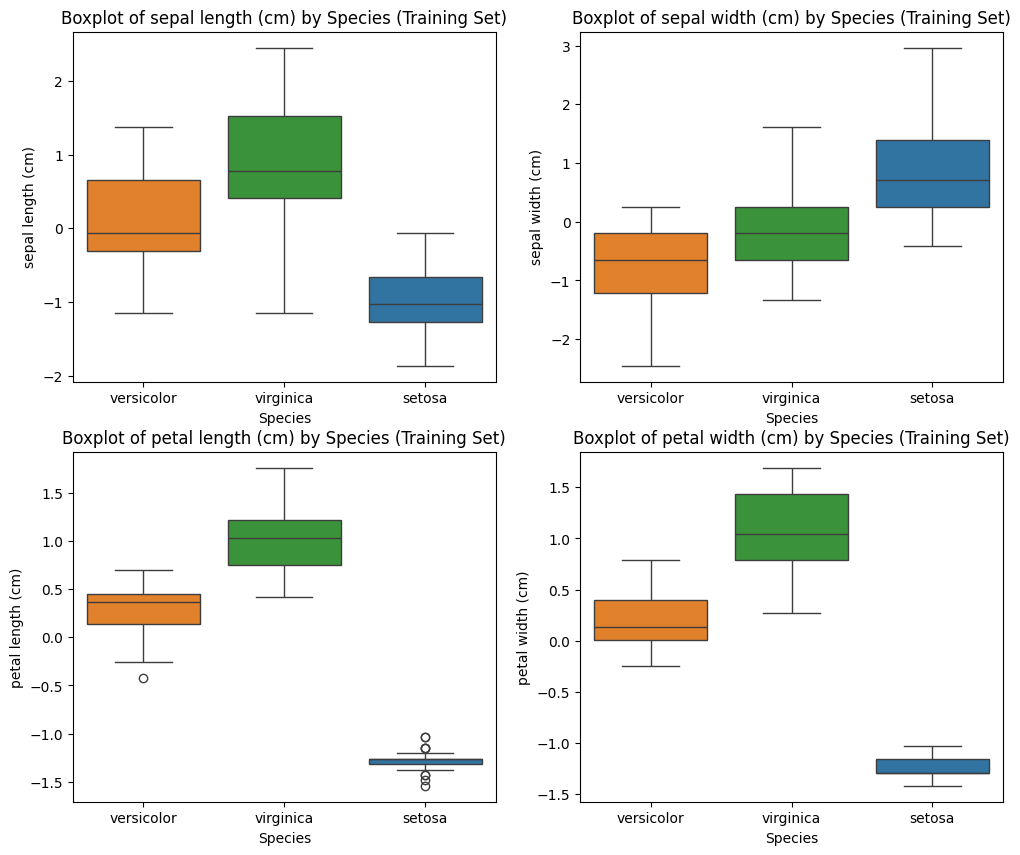

In [271]:
import seaborn as sns
palette = {
    'setosa': '#1f77b4',      # Blue
    'versicolor': '#ff7f0e',  # Orange
    'virginica': '#2ca02c'    # Green
}

df_train = pd.DataFrame(X_train, columns=feature_names)
df_train['Species'] = [target_names[i] for i in y_train]
plt.figure(figsize=(12, 10))
for i, feature in enumerate(feature_names):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=df_train, x='Species', y=feature, palette=palette)
    plt.title(f'Boxplot of {feature} by Species (Training Set)')
    plt.xlabel('Species')
    plt.ylabel(feature)

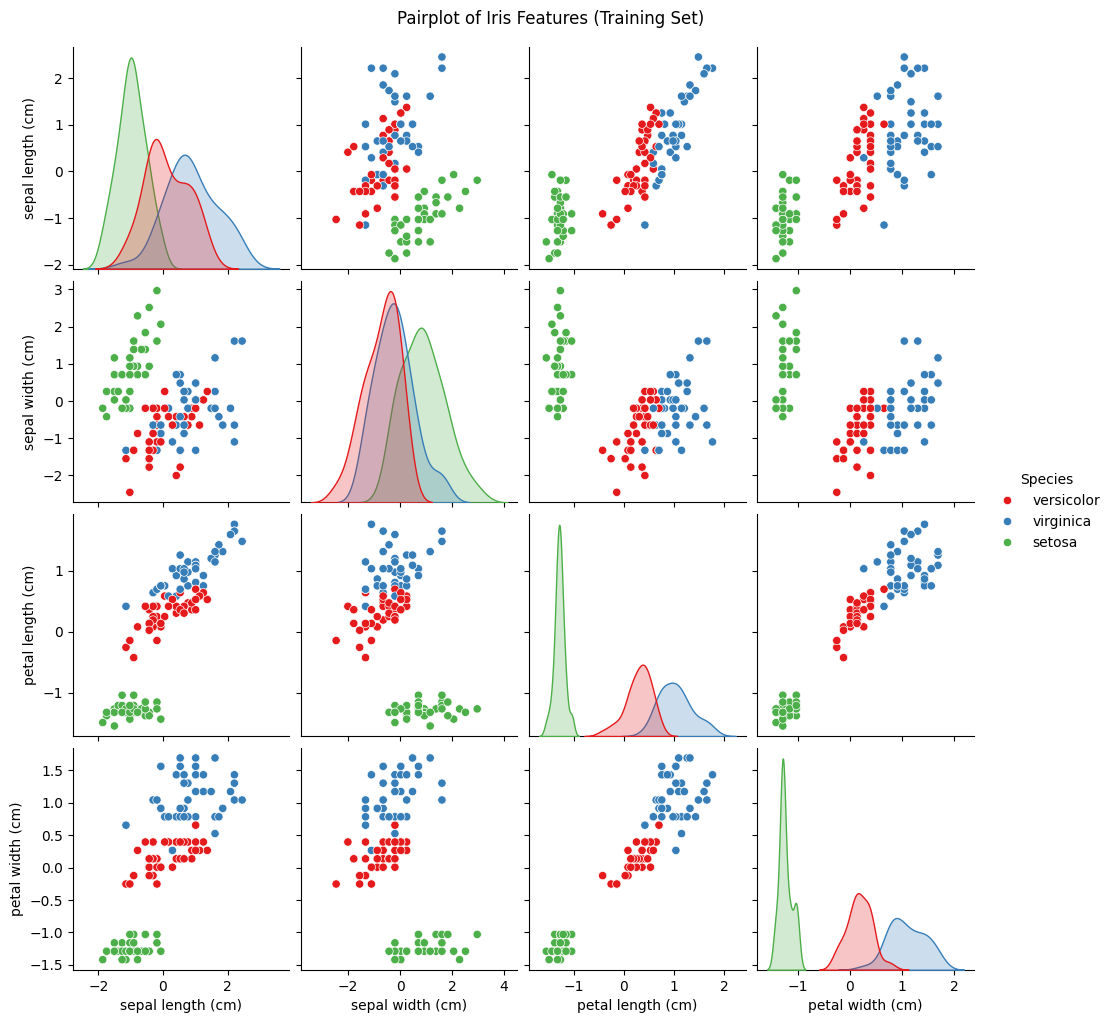

In [272]:
df_pairplot = pd.DataFrame(X_train, columns=feature_names)
df_pairplot['Species'] = [target_names[i] for i in y_train]

# Create pairplot
sns.pairplot(df_pairplot, hue='Species', diag_kind='kde', palette='Set1')
plt.suptitle("Pairplot of Iris Features (Training Set)", y=1.02)
plt.show()

In [273]:
# Train our model !
# Epochs? (one run through all the training data in our network)
epochs = 100
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model(X_train) # Get predicted results

  # Measure the loss/error , gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the train values

  losses.append(loss.detach().numpy()) # Track of losses

  # print every 10 epoch
  if i % 10 ==0:
    print(f'Epoch: {i} Loss: {loss}')

  #Do some back propagation: take the error rate of forward propagation
  # and feed it back through the neural network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 Loss: 1.1493475437164307
Epoch: 10 Loss: 1.0942965745925903
Epoch: 20 Loss: 1.0414704084396362
Epoch: 30 Loss: 0.9902343153953552
Epoch: 40 Loss: 0.9401715397834778
Epoch: 50 Loss: 0.890777587890625
Epoch: 60 Loss: 0.8419299721717834
Epoch: 70 Loss: 0.7937982678413391
Epoch: 80 Loss: 0.7469784021377563
Epoch: 90 Loss: 0.7021874189376831


Epoch 0:
  Train Loss: 0.6281, Train Accuracy: 0.8583
  Test Loss:  0.6956, Test Accuracy:  0.8667
Epoch 10:
  Train Loss: 0.4205, Train Accuracy: 0.8917
  Test Loss:  0.4911, Test Accuracy:  0.8667
Epoch 20:
  Train Loss: 0.3183, Train Accuracy: 0.9000
  Test Loss:  0.4008, Test Accuracy:  0.8333
Epoch 30:
  Train Loss: 0.2581, Train Accuracy: 0.9333
  Test Loss:  0.3523, Test Accuracy:  0.8333
Epoch 40:
  Train Loss: 0.2159, Train Accuracy: 0.9417
  Test Loss:  0.3207, Test Accuracy:  0.8333
Epoch 50:
  Train Loss: 0.1829, Train Accuracy: 0.9583
  Test Loss:  0.2935, Test Accuracy:  0.8667
Epoch 60:
  Train Loss: 0.1566, Train Accuracy: 0.9667
  Test Loss:  0.2720, Test Accuracy:  0.8667
Epoch 70:
  Train Loss: 0.1360, Train Accuracy: 0.9667
  Test Loss:  0.2505, Test Accuracy:  0.9000
Epoch 80:
  Train Loss: 0.1191, Train Accuracy: 0.9667
  Test Loss:  0.2369, Test Accuracy:  0.9000
Epoch 90:
  Train Loss: 0.1057, Train Accuracy: 0.9750
  Test Loss:  0.2209, Test Accuracy:  0.8667
E

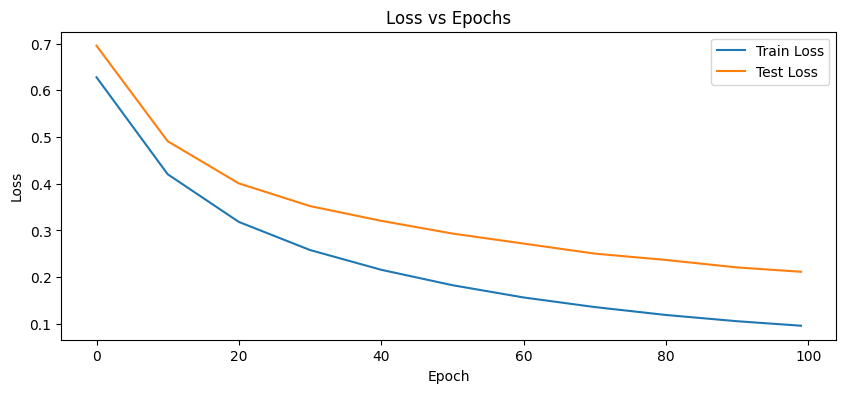

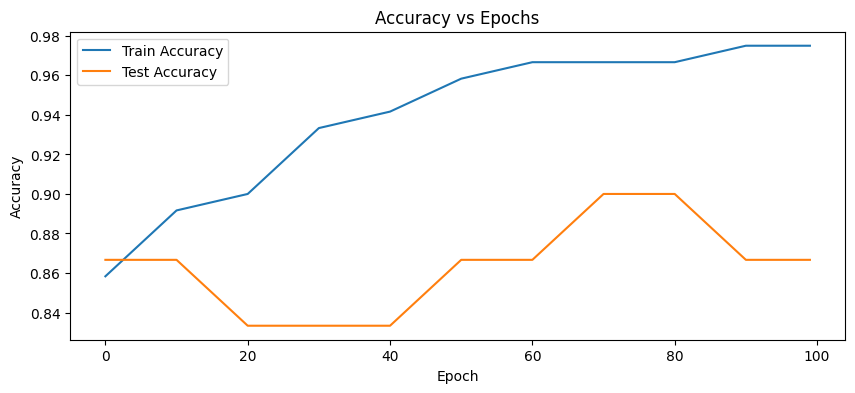

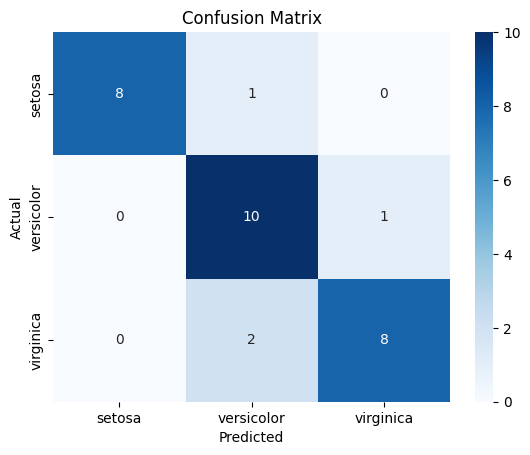

In [274]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



# Create DataLoaders
train_ds = TensorDataset(X_train, y_train)
test_ds = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=16)


epochs = 100
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(epochs):
    model.train()
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        preds = model(xb)
        loss = criterion(preds, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if epoch % 10 == 0 or epoch == epochs - 1:
        model.eval()
        with torch.no_grad():
            train_preds = model(X_train)
            train_loss = criterion(train_preds, y_train).item()
            train_acc = accuracy_score(y_train.cpu(), train_preds.argmax(dim=1).cpu())

            test_preds = model(X_test)
            test_loss = criterion(test_preds, y_test).item()
            test_acc = accuracy_score(y_test.cpu(), test_preds.argmax(dim=1).cpu())

            print(f"Epoch {epoch}:")
            print(f"  Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}")
            print(f"  Test Loss:  {test_loss:.4f}, Test Accuracy:  {test_acc:.4f}")

            train_losses.append(train_loss)
            test_losses.append(test_loss)
            train_accuracies.append(train_acc)
            test_accuracies.append(test_acc)

# Plot Loss vs Epochs
plt.figure(figsize=(10, 4))
plt.plot(list(range(0, epochs, 10)) + [epochs - 1], train_losses, label='Train Loss')
plt.plot(list(range(0, epochs, 10)) + [epochs - 1], test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()

# Plot Accuracy vs Epochs
plt.figure(figsize=(10, 4))
plt.plot(list(range(0, epochs, 10)) + [epochs - 1], train_accuracies, label='Train Accuracy')
plt.plot(list(range(0, epochs, 10)) + [epochs - 1], test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.show()

# Confusion Matrix
final_preds = model(X_test).argmax(dim=1).cpu().numpy()
cm = confusion_matrix(y_test.cpu(), final_preds)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
